Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# Data cleansing

### Date data type is not what it should be

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

In [31]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Now the date column is converted into time stamp data type

In [32]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [91]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2019-02-22,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


### Looking for duplicated rows

In [93]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

In [94]:
df.duplicated().sum()

3

In [96]:
df.drop_duplicates(inplace=True)

### Missing values

In [106]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

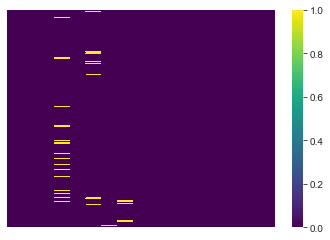

In [110]:
sns.heatmap(df.isnull(), xticklabels=False, yticklabels=False, cmap="viridis")

### We have missing in customer type, product line and quantity
### we cannot fill in the customer type and the product line for the customer so we can only fill in the quantity, this time we are filling with the mean of the column

In [112]:
df.fillna(df.mean(), inplace=True)

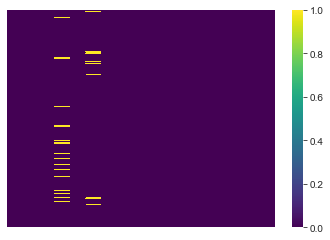

In [113]:
sns.heatmap(df.isnull(), xticklabels=False, yticklabels=False, cmap="viridis")

### We can see some yellow ticks are gone, the quantity column are filled up

# Explore the distribution of the customer rating 

In [114]:
sns.set_style("darkgrid")

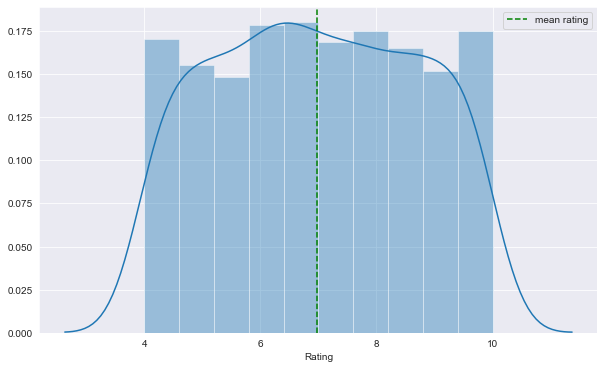

In [115]:
plt.figure(figsize=(10,6))
sns.distplot(df["Rating"])
plt.axvline(x=df["Rating"].mean(), color="green", linestyle="--", label="mean rating")
plt.legend()

### We can see that the distribution of rating are normally distribution

# Explore aggreagated sales across branches

In [116]:
df.groupby("Branch").sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,18647.020584,1864.517839,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
B,18475.410584,1806.539246,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
C,18577.860584,1832.510703,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


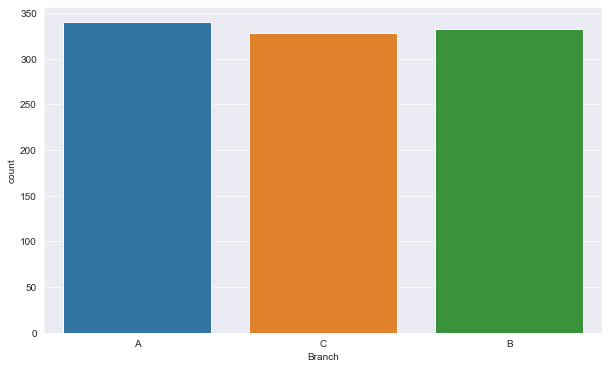

In [117]:
# Number of sales
plt.figure(figsize=(10,6))
sns.countplot(x=df["Branch"])

In [118]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

### We can see that the branches has little difference in terms of total sales and number of sales

# Is there a relationship between gross income and ratings?

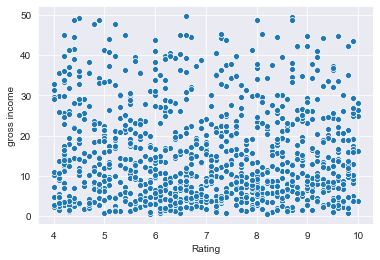

In [119]:
sns.scatterplot(x=df["Rating"], y=df["gross income"])

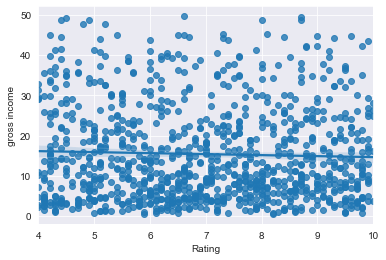

In [120]:
sns.regplot(x=df["Rating"], y=df["gross income"])

### There seem to be no relationship between how much a customer spent and how they rate, by reading the scatter plot there is not distinct pattern, reg plot further plotted that there is no significant relationship

# Exploring if there is any trend in spending in terms of date

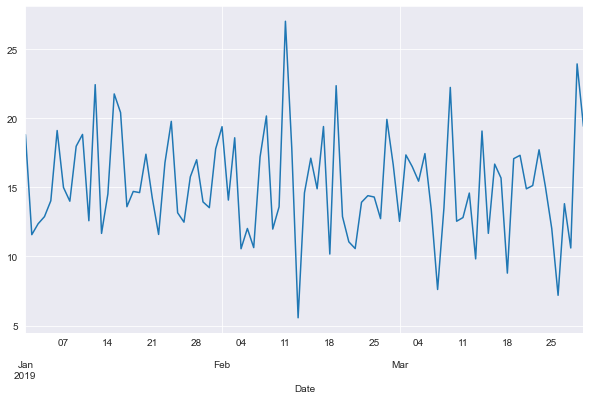

In [121]:
plt.figure(figsize=(10,6))
df.groupby("Date").mean()["gross income"].plot()

### There seem to be no particular pattern, considering this only contains 3 months of data, might be normal that it doesn't perform a pattern (e.g big surge before holiday)

# Correlation

In [126]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.478639e-02,6.290338e-01,6.290338e-01,6.290338e-01,-4.482629e-16,6.290338e-01,-6.601308e-03
Quantity,1.478639e-02,1.000000e+00,7.040671e-01,7.040671e-01,7.040671e-01,-8.293717e-17,7.040671e-01,-2.122532e-02
Tax 5%,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-4.482629e-16,-8.293717e-17,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-6.601308e-03,-2.122532e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


In [128]:
np.round(df.corr(),3)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000,0.015,0.629,0.629,0.629,-0.0,0.629,-0.007
Quantity,0.015,1.000,0.704,0.704,0.704,-0.0,0.704,-0.021
Tax 5%,0.629,0.704,1.000,1.000,1.000,0.0,1.000,-0.036
Total,0.629,0.704,1.000,1.000,1.000,0.0,1.000,-0.036
cogs,0.629,0.704,1.000,1.000,1.000,0.0,1.000,-0.036
gross margin percentage,-0.000,-0.000,0.000,0.000,0.000,1.0,0.000,0.000
gross income,0.629,0.704,1.000,1.000,1.000,0.0,1.000,-0.036
Rating,-0.007,-0.021,-0.036,-0.036,-0.036,0.0,-0.036,1.000


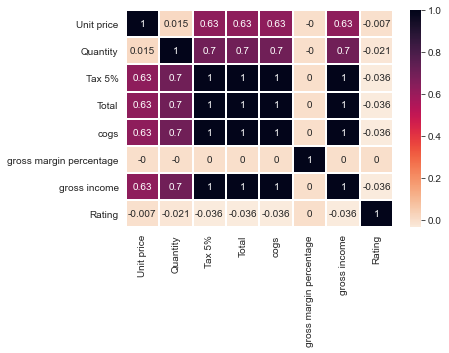

In [134]:
sns.heatmap(data=np.round(df.corr(),3), cmap=sns.cm.rocket_r, annot=True, linecolor="white", linewidths=1)